# Practice - Agentic AI and ReAct Agents

## What is ReAct? (Think of an AI Agent as a Person)

**ReAct** = **Reason** + **Act**

Imagine an AI agent like a person solving problems:
- **🧠 Mind**: Uses reasoning to think and plan
- **🛠️ Tools**: Interacts with the world to get things done
- **👀 Senses**: Observes results from the world
- **📝 Memory**: Remembers what it has learned

The agent repeats this loop:
1. **Thought 🧠**: What should I do?
2. **Action 🛠️**: Use a tool to do it
3. **Observation 👀**: What happened?
4. **Memory 📝**: Remember what I learned
5. **Repeat** until task is done

Let's learn by building.

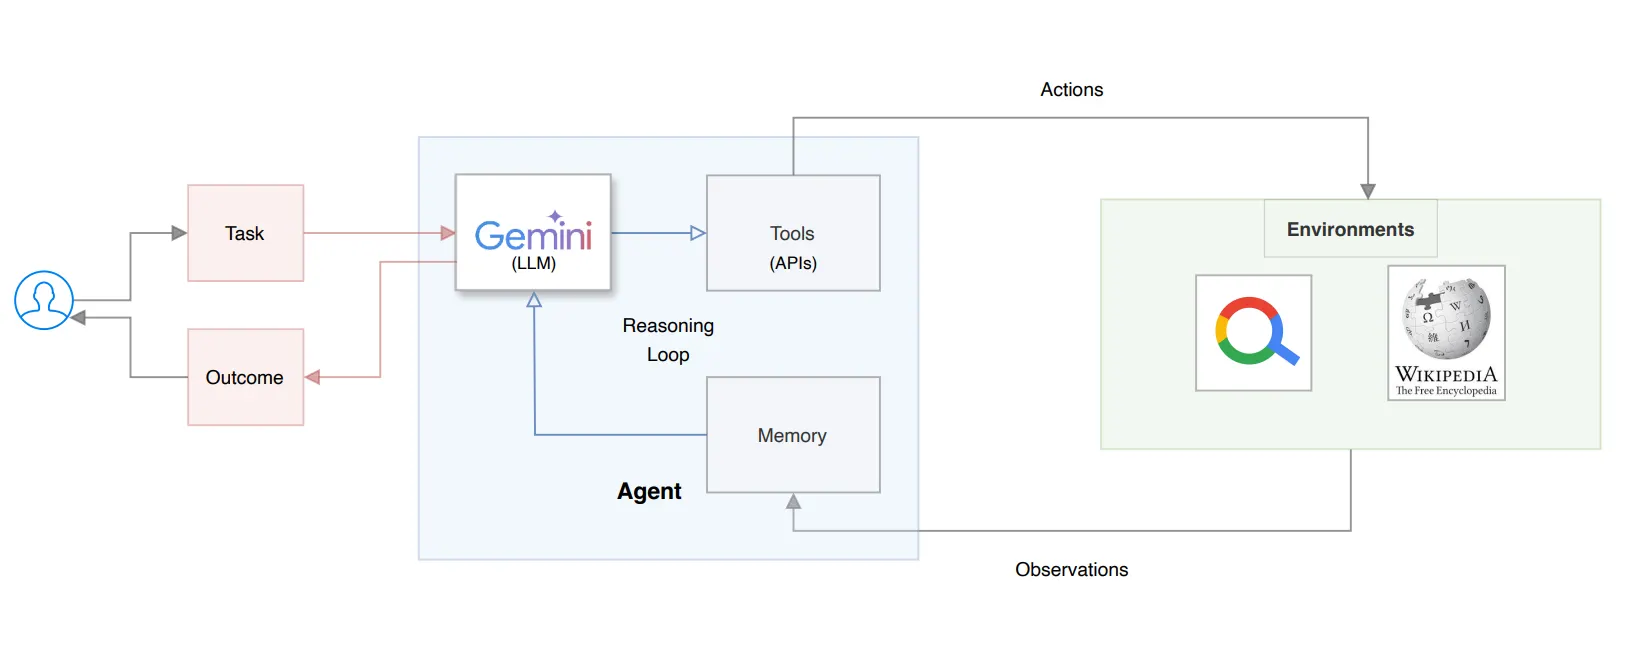

## PART 1: 🧠 Inside the Agent's Mind

Watch how an AI agent **thinks, acts, observes, and remembers**—just like a person!

### **Example 1: Weather Question**

**User Question:** "What's the weather in Paris and should I bring an umbrella?"

**Agent's Tools 🛠️:** 
- `get_weather(city)` - A tool that retrieves weather data

#### The Agent's Thought Loop:

| Step | Part | What the Agent Does |
|------|------|---------------------|
| 1 | 🧠 **Thought** | "I need to answer two things: the weather AND umbrella advice. Let me use my tool to get weather data." |
| 2 | 🛠️ **Action** | Uses tool `get_weather("Paris")` |
| 3 | 👀 **Observation** | Gets the response: `"Paris: 15°C, Rainy"` |
| 4 | 📝 **Memory** | Saves this as a memory: "Paris is 15°C and raining." |
| 5 | 🧠 **Thought** | "Since it's raining, an umbrella is definitely needed. I have all the info for the answer now." |
| 6 | ✅ **Answer** | "It's 15°C and rainy in Paris. Yes, you should bring an umbrella!" |

### **Example 2: Multi-Step Question** (ReAct Cycle)

**User Question:** "What's the capital of Japan and what's 2 + 2?"

**Agent's Tools 🛠️:**
- `get_capital(country)` - A tool that looks up capitals
- `calculate(expression)` - A tool that does math

**Key Insight:** The agent needs to use BOTH tools because there are TWO different questions!

#### The Agent's Thought Loop:

| Step | Part | What the Agent Does |
|------|------|---------------------|
| 1 | 🧠 **Thought** | "I notice this question asks for TWO different things: a capital and a calculation. I'll start with the capital." |
| 2 | 🛠️ **Action** | Uses tool `get_capital("Japan")` |
| 3 | 👀 **Observation** | Gets the response: `"Tokyo"` |
| 4 | 📝 **Memory** | Saves "Japan's capital is Tokyo" to memory. |
| 5 | 🧠 **Thought** | "Now I need to address the second part: the math problem." |
| 6 | 🛠️ **Action** | Uses tool `calculate("2 + 2")` |
| 7 | 👀 **Observation** | Gets the response: `"4"` |
| 8 | 📝 **Memory** | Saves "2 + 2 equals 4" to memory. |
| 9 | 🧠 **Thought** | "I have both pieces of information now. I can combine them for the final answer." |
| 10 | ✅ **Answer** | "The capital of Japan is Tokyo and 2 + 2 is 4!" |

**The ReAct Pattern:**
Notice how we always follow: **Thought → Action → Observation → Memory**. If we aren't done, we start the cycle again with a new **Thought**!

## PART 2: Tools - The Agent's Hands 🙌

Tools are the core capabilities of an AI agent. 

Just like your hands let you interact with the world, **tools let agents interact with data, systems, and the internet.**

In [25]:
def add(a: float, b: float) -> float:
    """Tool #1: Add two numbers."""
    return a + b


def multiply(a: float, b: float) -> float:
    """Tool #2: Multiply two numbers."""
    return a * b


def divide(a: float, b: float) -> float | dict:
    """Tool #3: Divide two numbers. Returns error if b is zero."""
    if b == 0:
        return {"error": "Cannot divide by zero"}
    return a / b


# Test the tools
print("Agent testing its tools:")
print(f"Tool #1 (add): 5 + 3 = {add(5, 3)}")
print(f"Tool #2 (multiply): 4 * 6 = {multiply(4, 6)}")
print(f"Tool #3 (divide): 10 / 2 = {divide(10, 2)}")
print(f"Tool #3 error handling: 10 / 0 = {divide(10, 0)}")

Agent testing its tools:
Tool #1 (add): 5 + 3 = 8
Tool #2 (multiply): 4 * 6 = 24
Tool #3 (divide): 10 / 2 = 5.0
Tool #3 error handling: 10 / 0 = {'error': 'Cannot divide by zero'}


### Exercise 1: Give the Agent a New Tool 🙌

Create a new tool that does something useful. Examples:
- Convert temperature (Celsius to Fahrenheit)
- Calculate area of a rectangle
- Get length of text
- Check if a number is even or odd

Design and test your new tool below:

In [26]:
# TODO: Create a tool of your choice below


def my_tool(a: int) -> str:
    """My tool: checks if a number is even or odd."""
    return "even" if a % 2 == 0 else "odd"


# Test your new tool:
print(my_tool(5))
print(my_tool(20))

odd
even


### Exercise 2: Build More Tools 🔧

Now create **two** more tools:
1. **`subtract(a, b)`** — Subtracts b from a
2. **`power(base, exponent)`** — Raises base to the power of exponent (e.g., 2³ = 8)

Make sure to test them with a few examples!

In [27]:
# TODO: Create a subtract tool
def subtract(a: float, b: float) -> float:
    """Tool: Subtract b from a."""
    return a - b


# TODO: Create a power tool
def power(base: float, exponent: float) -> float:
    """Tool: Raise base to the power of exponent."""
    return base**exponent


# Test your tools:
print(f"10 - 3 = {subtract(10, 3)}")
print(f"2 ^ 8 = {power(2, 8)}")
print(f"5 ^ 0 = {power(5, 0)}")

10 - 3 = 7
2 ^ 8 = 256
5 ^ 0 = 1


### Exercise 2b: Build a Tool with Error Handling 🛡️

Real-world tools need to handle **bad input** gracefully. An agent shouldn't crash — it should get a helpful error message and try something else.

Create a `safe_divide(a, b)` tool that:
- Returns `{"result": a / b}` when `b` is not zero
- Returns `{"error": "Cannot divide by zero"}` when `b` is zero

**Why does this matter for agents?** If a tool crashes, the entire ReAct loop breaks. Good error handling lets the agent **recover** and try a different approach.

In [28]:
# TODO: Create a safe_divide tool with proper error handling
def safe_divide(a: float, b: float) -> dict:
    """Divide a by b with error handling for division by zero."""
    if b == 0:
        return {"error": "Cannot divide by zero"}
    return {"result": a / b}


# Test cases — all should work without crashing:
print(safe_divide(10, 2))        # Expected: {"result": 5.0}
print(safe_divide(10, 0))        # Expected: {"error": "Cannot divide by zero"}

{'result': 5.0}
{'error': 'Cannot divide by zero'}


## PART 3: Memory - The Agent's Notebook 📝

Now let's see an agent **Reason → Act → Observe → Remember → Repeat**.

### The ReAct Cycle (One Loop):

| Step | Phase | What the Agent Does |
|------|-------|---------------------|
| 1 | 🧠 **Reason** | "What do I need to do? Which hand should I use?" |
| 2 | 🙌 **Act** | Use a tool by calling it with the right input |
| 3 | 👀 **Observe** | Get the result back from the tool |
| 4 | 📝 **Remember** | Store what I learned: "The tool returned X" |
| 5 | 🧠 **Reason Again** | "Do I have what I need, or do I need another tool?" |

If the answer is "I need another tool" → Go back to **Act** (step 2)  
If the answer is "I'm done" → Give the **Final Answer** ✅

In [29]:
# Example: Agent's Thought Process with Memory

# Task: Calculate 25 * 4, then add 10 to the result
task = "Calculate 25 * 4, then add 10 to the result"
print(f"📋 Task: {task}\n")
print("=" * 60)

# --- STEP 1: Multiply 25 * 4 ---
thought = "I need two steps: multiply first, then add. Let me use my multiply tool."
print(f"🧠 Thought: {thought}")

# --- STEP 2: First Action (use multiply tool) ---
result1 = multiply(25, 4)
print("🙌 Action: Use multiply tool → multiply(25, 4)")

# --- STEP 3: First Observation ---
print(f"👀 Observation: Got {result1}")

# --- STEP 4: Memory Update ---
memory = f"Remember: 25 * 4 = {result1}"
print(f"📝 Memory: {memory}\n")


# --- TODO: CONTINUE TO IMPLEMENT THE NEXT STEPS ---
# TODO: Finish the second part of the loop!
# 1. 🧠 Thought: What do you need to do now?
# 2. 🙌 Action: Use the 'add' tool with result1 and 10
# 3. 👀 Observation: What is the result?
# 4. 📝 Memory: Update your final memory
# 5. ✅ Answer: Print the final answer

# YOUR CODE HERE:
thought = "I need to do the second step, which is add 10 to the result1. Let me use my add tool."
print(f"🧠 Thought: {thought}")

result2 = add(result1, 10)
print("🙌 Action: Use add tool → add(result1, 10)")

print(f"👀 Observation: Got {result2}")

memory2 = f"Remember: result1 + 10 = {result2}"
print(f"📝 Memory: {memory2}\n")

print(f"✅ Answer: {result2}")


📋 Task: Calculate 25 * 4, then add 10 to the result

🧠 Thought: I need two steps: multiply first, then add. Let me use my multiply tool.
🙌 Action: Use multiply tool → multiply(25, 4)
👀 Observation: Got 100
📝 Memory: Remember: 25 * 4 = 100

🧠 Thought: I need to do the second step, which is add 10 to the result1. Let me use my add tool.
🙌 Action: Use add tool → add(result1, 10)
👀 Observation: Got 110
📝 Memory: Remember: result1 + 10 = 110

✅ Answer: 110


### Exercise 3: Complete a 3-Step ReAct Trace 🔄

Now try a **harder** task that requires **three** tool calls!

**Task:** *"Calculate (8 + 2) * 5, then subtract 15 from the result"*

Steps needed:
1. 🙌 Use `add(8, 2)` → get 10
2. 🙌 Use `multiply(result, 5)` → get 50
3. 🙌 Use `subtract(result, 15)` → get 35

Follow the same Thought → Action → Observation → Memory pattern for **all three** steps, then print the final answer.

In [30]:
# Exercise 3: 3-Step ReAct Trace
# Task: Calculate (8 + 2) * 5, then subtract 15 from the result

task = "Calculate (8 + 2) * 5, then subtract 15"
print(f"📋 Task: {task}\n")
print("=" * 60)

# TODO: Complete all 3 steps following the same pattern as the example above
# Each step needs: Thought → Action → Observation → Memory
# Step 1: Add
# Step 2: Multiply
# Step 3: Subtract
# Then print the final answer

# Step 1:
thought = "I need three steps: add first, then multiply and subtract. Let me use my add tool."
print(f"🧠 Thought: {thought}")

result1 = add(8, 2)
print("🙌 Action: Use add tool → add(8, 2)")

print(f"👀 Observation: Got {result1}")

memory1 = f"Remember: 8 + 2 = {result1}"
print(f"📝 Memory: {memory1}\n")

# Step 2:
thought = "I need to do the second step, which is multiplication. Let me use my multiply tool."
print(f"🧠 Thought: {thought}")

result2 = multiply(result1, 5)
print("🙌 Action: Use multiply tool → multiply(result1, 5)")

print(f"👀 Observation: Got {result2}")

memory2 = f"Remember: result1 * 5 = {result2}"
print(f"📝 Memory: {memory2}\n")


# Step 3:
thought = "I need to do the third step, which is subtraction. Let me use my subtract tool."
print(f"🧠 Thought: {thought}")

result3 = subtract(result2, 15)
print("🙌 Action: Use subtract tool → subtract(result2, 15)")

print(f"👀 Observation: Got {result3}")

memory3 = f"Remember: result2 - 15 = {result3}"
print(f"📝 Memory: {memory3}\n")

print(f"✅ Answer: {result3}")

📋 Task: Calculate (8 + 2) * 5, then subtract 15

🧠 Thought: I need three steps: add first, then multiply and subtract. Let me use my add tool.
🙌 Action: Use add tool → add(8, 2)
👀 Observation: Got 10
📝 Memory: Remember: 8 + 2 = 10

🧠 Thought: I need to do the second step, which is multiplication. Let me use my multiply tool.
🙌 Action: Use multiply tool → multiply(result1, 5)
👀 Observation: Got 50
📝 Memory: Remember: result1 * 5 = 50

🧠 Thought: I need to do the third step, which is subtraction. Let me use my subtract tool.
🙌 Action: Use subtract tool → subtract(result2, 15)
👀 Observation: Got 35
📝 Memory: Remember: result2 - 15 = 35

✅ Answer: 35


---

## PART 4: 🧠 From Manual to AI Brain - Using Real LLMs with OpenAI API

So far, we've **manually** written what the agent thinks. But real agents have an **AI brain** that reasons automatically!

Instead of us writing the reasoning, we use **OpenAI's GPT-4 model** via the **OpenAI API** to generate thoughts.

### The Complete Loop:

**Task → [ Reason → Act → Observe → Remember ]* → Answer**

At each iteration:
1. **🧠 Reason**: GPT-4 thinks about the task and what to do next
2. **🙌 Act**: Execute the tools GPT-4 requests
3. **👀 Observe**: Get the results back
4. **📝 Remember**: Add results to memory (conversation)
5. **🧠 Reason (again)**: Decide: Continue loop? Or give final answer?

The loop **automatically stops** when:
- ✅ GPT-4 returns a final answer (not a tool call)
- ⚠️ Max iterations reached (safety limit)

Let's build it!

# Step 1: Setup OpenAI Client


In [31]:
from openai import OpenAI
import os
from dotenv import load_dotenv
import json

# Load environment variables from .env file
load_dotenv()

openai_endpoint = os.getenv("OPENAI_ENDPOINT")
openai_api_key = os.getenv("OPENAI_API_KEY")

MODEL = "gpt-4.1-mini"

if not openai_endpoint or not openai_api_key:
    raise ValueError("❌ OpenAI credentials not found!\n")

client = OpenAI(
    base_url=openai_endpoint,
    api_key=openai_api_key,
)

print(f"✅ OpenAI configured (model: {MODEL}")
# print(f"✅ OpenAI configured (openai_endpoint: {openai_endpoint}")
# print(f"✅ OpenAI configured (openai_api_key: {openai_api_key}")


✅ OpenAI configured (model: gpt-4.1-mini


# Step 2: Define the Agent's Tools

### Define tool functions

In [32]:
def add_numbers(a: float, b: float) -> dict:
    """Add two numbers."""
    return {"result": a + b}


def multiply_numbers(a: float, b: float) -> dict:
    """Multiply two numbers."""
    return {"result": a * b}


def divide_numbers(a: float, b: float) -> dict:
    """Divide two numbers (handles division by zero)."""
    if b == 0:
        return {"error": "Cannot divide by zero"}
    return {"result": a / b}


def final_answer(answer: str, explanation: str = ""):
    """Returns the final answer to the user."""
    return answer


# Tools the agent is allowed to call
tools = [add_numbers, multiply_numbers, divide_numbers, final_answer]

#### Create function declarations that will let the agent know what tools it can use.

In [33]:
# Tool name -> Python function mapping
TOOLS_MAP = {
    "add_numbers": add_numbers,
    "multiply_numbers": multiply_numbers,
    "divide_numbers": divide_numbers,
    # "final_answer" is handled specially inside react_cycle()
}

print("✅ Agent Tools Defined:")
for name in TOOLS_MAP.keys():
    print(f"   🙌 {name}")

✅ Agent Tools Defined:
   🙌 add_numbers
   🙌 multiply_numbers
   🙌 divide_numbers


# Step 3: The ReAct Cycle

## How It Works:

1. **Send user prompt + tools to GPT-4.1**: "Here's a task and here are the tools you can use"
2. **Loop**  until final answer is provided or max_iterations is reached:
   - 🧠 GPT-4.1 thinks and decides: "Do I need a tool, or can I answer?"
   - If tool needed:
     - 🙌 GPT-4.1 tells us which tool and what arguments
     - 👀 We call the tool and get result
     - 📝 We add result to memory and send back to GPT-4.1
   - If answer ready:
     - ✅ Return the final answer and stop loop

## The Code:

#### Helper functions for tidy code.

In [34]:
import inspect
from typing import Callable, get_type_hints


def function_to_openai_tool(func: Callable) -> dict:
    """Convert a Python function to Responses API tool format."""

    sig = inspect.signature(func)
    hints = get_type_hints(func) if hasattr(func, "__annotations__") else {}

    properties = {}
    required = []

    for param_name, param in sig.parameters.items():
        param_type = hints.get(param_name, str)

        json_type = "string"
        if param_type in (int, float):
            json_type = "number"
        elif param_type is bool:
            json_type = "boolean"

        properties[param_name] = {"type": json_type}
        if param.default == inspect.Parameter.empty:
            required.append(param_name)

    return {
        "type": "function",
        "name": func.__name__,
        "description": func.__doc__ or "",
        "parameters": {
            "type": "object",
            "properties": properties,
            "required": required,
        },
    }

In [35]:
def get_response(
    input_items: list,
    tools: list,
    previous_response_id: str | None = None,
    instructions: str | None = None,
):
    """Call the OpenAI Responses API with tool support."""

    openai_tools = [function_to_openai_tool(t) for t in tools]
    return client.responses.create(
        model=MODEL,
        input=input_items,
        tools=openai_tools,
        tool_choice="auto",
        previous_response_id=previous_response_id,
        instructions=instructions,
    )

In [36]:
def execute_tool(tool_name: str, tool_args: dict, tool_map: dict):
    """Run a tool and return its result (or an error dict)."""

    if tool_name not in tool_map:
        return {"error": f"Tool '{tool_name}' not found"}

    try:
        return tool_map[tool_name](**(tool_args or {}))
    except Exception as exc:
        return {"error": str(exc)}

In [37]:
def extract_function_calls(response) -> list:
    """Return function_call items from a Responses API response."""

    return [
        item
        for item in (response.output or [])
        if getattr(item, "type", None) == "function_call"
    ]

#### ReAct Cycle function

In [38]:
DEFAULT_SYSTEM_INSTRUCTION = "Solve this task. You must use tools to help you."

 
def format_final_answer(tool_args: dict) -> str:
    """Format the final answer payload the model returns via the final_answer tool."""
    answer = tool_args.get("answer")
    explanation = tool_args.get("explanation")

    if explanation:
        # Make explanations easier to read by adding line breaks after sentences.
        explanation = explanation.replace(". ", ".\n")
        return f"{answer}\n\n📝 Explanation:\n{explanation}"

    return answer


def react_cycle(
    task: str,
    tools: list,
    tool_map: dict,
    system_instruction: str = DEFAULT_SYSTEM_INSTRUCTION,
    max_iterations: int = 10,
) -> str | None:
    """Run a simple ReAct loop: reason -> act -> observe -> repeat."""

    # We explicitly tell the model how to stop:
    # when it's done, it should call the `final_answer` tool.
    instructions = (
        f"{system_instruction} When you have the answer, use the final_answer tool."
    )

    # The Responses API can keep a server-side conversation thread.
    # We pass `previous_response_id` so each iteration continues the same conversation.
    previous_response_id = None

    # `messages` is what we send to the model each iteration.
    # First time: we send the user task.
    messages = [{"role": "user", "content": f"Task: {task}"}]

    for iteration in range(max_iterations):
        print(f"\n--- ITERATION {iteration + 1} ---")

        # 1) REASON: ask the model what to do next (and allow tool calling)
        try:
            response = get_response(
                messages,
                tools,
                previous_response_id=previous_response_id,
                instructions=instructions,
            )
            print("🧠 REASON")
        except Exception as exc:
            print(f"⚠️ Error during generation: {exc}")
            return None

        # Save response id so the next call continues the same thread.
        previous_response_id = response.id

        # 2) Check whether the model asked to call any tools.
        tool_calls = extract_function_calls(response)

        # If there are no tool calls, we expect the model to just answer normally.
        if not tool_calls:
            text = getattr(response, "output_text", None)
            if text:
                print(f"✅ FINAL ANSWER: {text}")
                return text

            print("⚠️ Model returned empty response (no text, no tools).")
            return None

        # 3) ACT + OBSERVE: run each requested tool and capture its output.
        tool_outputs = []
        for call in tool_calls:
            tool_name = call.name

            # Tool arguments arrive as JSON; parse them into a Python dict.
            tool_args = (
                json.loads(call.arguments) if getattr(call, "arguments", None) else {}
            )

            print(f"🙌 ACT: Calling '{tool_name}' with {tool_args}")

            # Special case: the model is done and wants to return a final answer.
            if tool_name == "final_answer":
                final_text = format_final_answer(tool_args)
                print(f"✅ FINAL ANSWER: {final_text}")
                return final_text

            # Normal tools (like add_numbers/multiply_numbers/divide_numbers)
            result = execute_tool(tool_name, tool_args, tool_map)
            print(f"👀 OBSERVE: Result = {result}")

            # 4) REMEMBER: store tool result in the exact format the Responses API expects,
            # so we can send it back to the model on the next iteration.
            tool_outputs.append(
                {
                    "type": "function_call_output",
                    "call_id": call.call_id,
                    "output": json.dumps(result),
                }
            )
            print(f"📝 REMEMBER: Stored result for '{tool_name}'")

        # Next iteration: we send ONLY the tool outputs.
        # The model will still know the task because we continue the same thread
        # using `previous_response_id`.
        messages = tool_outputs

    print(f"⚠️ Max iterations ({max_iterations}) reached")
    return None


# Test the ReAct cycle with a sample task
result = react_cycle(
    "Calculate (100 + 50) * 2, then divide the result by 3",
    tools,
    TOOLS_MAP,
)



--- ITERATION 1 ---
🧠 REASON
🙌 ACT: Calling 'add_numbers' with {'a': 100, 'b': 50}
👀 OBSERVE: Result = {'result': 150}
📝 REMEMBER: Stored result for 'add_numbers'
🙌 ACT: Calling 'divide_numbers' with {'a': 0, 'b': 3}
👀 OBSERVE: Result = {'result': 0.0}
📝 REMEMBER: Stored result for 'divide_numbers'

--- ITERATION 2 ---
🧠 REASON
🙌 ACT: Calling 'multiply_numbers' with {'a': 150, 'b': 2}
👀 OBSERVE: Result = {'result': 300}
📝 REMEMBER: Stored result for 'multiply_numbers'

--- ITERATION 3 ---
🧠 REASON
🙌 ACT: Calling 'divide_numbers' with {'a': 300, 'b': 3}
👀 OBSERVE: Result = {'result': 100.0}
📝 REMEMBER: Stored result for 'divide_numbers'

--- ITERATION 4 ---
🧠 REASON
🙌 ACT: Calling 'final_answer' with {'answer': '100', 'explanation': 'First, 100 + 50 = 150. Then, 150 * 2 = 300. Finally, 300 divided by 3 equals 100.'}
✅ FINAL ANSWER: 100

📝 Explanation:
First, 100 + 50 = 150.
Then, 150 * 2 = 300.
Finally, 300 divided by 3 equals 100.


### Exercise 4: Test the Agent with Your Own Task 🤖

The `react_cycle` function is your AI agent! Try giving it a **different math problem** and watch the ReAct loop in action.

Ideas to try:
- `"What is 999 divided by 3, then add 7?"`
- `"Multiply 12 by 8, then divide by 4"`  
- `"Add 100 and 250, then multiply by 0"`

In [39]:
# TODO: Write your own task and run the react_cycle!
my_task = "What is 12345679 multiplied by 9 and add 9999?"
my_result = react_cycle(my_task, tools, TOOLS_MAP)
print(f"\n🎯 Agent's answer: {my_result}")


--- ITERATION 1 ---
🧠 REASON
🙌 ACT: Calling 'multiply_numbers' with {'a': 12345679, 'b': 9}
👀 OBSERVE: Result = {'result': 111111111}
📝 REMEMBER: Stored result for 'multiply_numbers'
🙌 ACT: Calling 'add_numbers' with {'a': 0, 'b': 9999}
👀 OBSERVE: Result = {'result': 9999}
📝 REMEMBER: Stored result for 'add_numbers'

--- ITERATION 2 ---
🧠 REASON
🙌 ACT: Calling 'add_numbers' with {'a': 111111111, 'b': 9999}
👀 OBSERVE: Result = {'result': 111121110}
📝 REMEMBER: Stored result for 'add_numbers'

--- ITERATION 3 ---
🧠 REASON
🙌 ACT: Calling 'final_answer' with {'answer': '111121110', 'explanation': 'First, multiply 12345679 by 9, which equals 111111111. Then, add 9999 to that result, giving a total of 111121110.'}
✅ FINAL ANSWER: 111121110

📝 Explanation:
First, multiply 12345679 by 9, which equals 111111111.
Then, add 9999 to that result, giving a total of 111121110.

🎯 Agent's answer: 111121110

📝 Explanation:
First, multiply 12345679 by 9, which equals 111111111.
Then, add 9999 to that r

### Exercise 4b: Expand the Agent's Toolbox 🧰

The LLM-powered agent currently only has `add_numbers`, `multiply_numbers`, and `divide_numbers`. But it can't subtract!

**Task:**
1. Create a new `subtract_numbers(a, b)` function (same style as the others — typed parameters, returns a dict)
2. Add it to the `tools` list AND the `TOOLS_MAP`
3. Test the agent with a task that **requires subtraction**, like: `"What is 500 minus 137, then multiply by 2?"`


In [40]:
# TODO: Create a subtract_numbers tool (same style as add_numbers)

def subtract_numbers(a: float, b: float) -> dict:
    """Subtract two numbers"""
    return {"result": a - b}

# TODO: Add it to the tools list and TOOLS_MAP
tools.append(subtract_numbers)

TOOLS_MAP["subtract_numbers"] = subtract_numbers    


# TODO: Test the agent with a subtraction task

my_task = "What is -800 subtracted by 800, then added 10 to the result?"
my_result = react_cycle(my_task, tools, TOOLS_MAP)
print(f"\n🎯 Agent's answer: {my_result}")


--- ITERATION 1 ---
🧠 REASON
🙌 ACT: Calling 'subtract_numbers' with {'a': -800, 'b': 800}
👀 OBSERVE: Result = {'result': -1600}
📝 REMEMBER: Stored result for 'subtract_numbers'

--- ITERATION 2 ---
🧠 REASON
🙌 ACT: Calling 'add_numbers' with {'a': -1600, 'b': 10}
👀 OBSERVE: Result = {'result': -1590}
📝 REMEMBER: Stored result for 'add_numbers'

--- ITERATION 3 ---
🧠 REASON
🙌 ACT: Calling 'final_answer' with {'answer': '-1590', 'explanation': 'First, subtracting 800 from -800 gives -1600. Then, adding 10 to -1600 results in -1590.'}
✅ FINAL ANSWER: -1590

📝 Explanation:
First, subtracting 800 from -800 gives -1600.
Then, adding 10 to -1600 results in -1590.

🎯 Agent's answer: -1590

📝 Explanation:
First, subtracting 800 from -800 gives -1600.
Then, adding 10 to -1600 results in -1590.


### Exercise 4c: Change the Agent's Personality 🎭

The `system_instruction` parameter controls **how** the agent behaves — its personality, style, and rules.

**Task:** Run the **same math task** with two different system instructions and compare the results:
1. `"You are a precise math teacher. Show your work step by step."`
2. `"You are a pirate. Answer like a pirate but still use tools for calculations."`

**What to observe:** How does the system instruction change the agent's behavior? Does it affect tool usage or just the final answer text?

In [41]:
# TODO: Try the same task with two different system instructions (see descriptions above)
task = "Calculate 15 + 27, then multiply by 3"

# TODO: Instruction 1
my_result = react_cycle(task, tools, TOOLS_MAP, system_instruction="You are a precise math teacher. Show your work step by step.")
print(f"\n🎯 Agent's answer: {my_result}")

# TODO: Instruction 2
my_result = react_cycle(task, tools, TOOLS_MAP, system_instruction="You are a pirate. Answer like a pirate but still use tools for calculations.")
print(f"\n🎯 Agent's answer: {my_result}")


--- ITERATION 1 ---
🧠 REASON
🙌 ACT: Calling 'add_numbers' with {'a': 15, 'b': 27}
👀 OBSERVE: Result = {'result': 42}
📝 REMEMBER: Stored result for 'add_numbers'

--- ITERATION 2 ---
🧠 REASON
🙌 ACT: Calling 'multiply_numbers' with {'a': 42, 'b': 3}
👀 OBSERVE: Result = {'result': 126}
📝 REMEMBER: Stored result for 'multiply_numbers'

--- ITERATION 3 ---
🧠 REASON
🙌 ACT: Calling 'final_answer' with {'answer': '126', 'explanation': 'First, I added 15 and 27 to get 42. Then, I multiplied 42 by 3 to get the final result of 126.'}
✅ FINAL ANSWER: 126

📝 Explanation:
First, I added 15 and 27 to get 42.
Then, I multiplied 42 by 3 to get the final result of 126.

🎯 Agent's answer: 126

📝 Explanation:
First, I added 15 and 27 to get 42.
Then, I multiplied 42 by 3 to get the final result of 126.

--- ITERATION 1 ---
🧠 REASON
🙌 ACT: Calling 'add_numbers' with {'a': 15, 'b': 27}
👀 OBSERVE: Result = {'result': 42}
📝 REMEMBER: Stored result for 'add_numbers'

--- ITERATION 2 ---
🧠 REASON
🙌 ACT: Callin

### Exercise 4d: Test Edge Cases & Safety Limits ⚠️

Agents can get **stuck in loops** or take too many steps. The `max_iterations` parameter is a safety net.

**Task 1:** Run a complex multi-step task with `max_iterations=1`. What happens?

**Task 2:** Ask the agent to divide by zero: `"What is 10 divided by 0?"`. How does the agent handle the error from the tool?

**Key Insight:** These edge cases show why agents need good error handling, iteration limits, and clear tool descriptions!

In [42]:
# TODO Task 1: Test with max_iterations=1 on a multi-step problem
# What happens when the agent doesn't have enough iterations?
task = "What is 10 multiplied by 9, then add 5 and subtract 1?"

# TODO: Instruction 1
my_result = react_cycle(task, tools, TOOLS_MAP, max_iterations=1)
print(f"\n🎯 Agent's answer: {my_result}")


--- ITERATION 1 ---
🧠 REASON
🙌 ACT: Calling 'multiply_numbers' with {'a': 10, 'b': 9}
👀 OBSERVE: Result = {'result': 90}
📝 REMEMBER: Stored result for 'multiply_numbers'
🙌 ACT: Calling 'add_numbers' with {'a': 5, 'b': -1}
👀 OBSERVE: Result = {'result': 4}
📝 REMEMBER: Stored result for 'add_numbers'
⚠️ Max iterations (1) reached

🎯 Agent's answer: None


In [43]:
# TODO Task 2: Test division by zero — how does the agent handle tool errors?
task = "What is 10 divided by 0?"
my_result = react_cycle(task, tools, TOOLS_MAP)
print(f"\n🎯 Agent's answer: {my_result}")


--- ITERATION 1 ---
🧠 REASON
🙌 ACT: Calling 'divide_numbers' with {'a': 10, 'b': 0}
👀 OBSERVE: Result = {'error': 'Cannot divide by zero'}
📝 REMEMBER: Stored result for 'divide_numbers'

--- ITERATION 2 ---
🧠 REASON
🙌 ACT: Calling 'final_answer' with {'answer': 'undefined', 'explanation': 'Division by zero is undefined in mathematics because it does not result in a finite or meaningful number.'}
✅ FINAL ANSWER: undefined

📝 Explanation:
Division by zero is undefined in mathematics because it does not result in a finite or meaningful number.

🎯 Agent's answer: undefined

📝 Explanation:
Division by zero is undefined in mathematics because it does not result in a finite or meaningful number.


## PART 5: 🚀 Challenge: Build a Web Search Agent!

Now it's time to give your agent **super-vision**! 

Your agent is smart, but it doesn't know about current events (like today's news). We'll fix that by giving it a "Web Search" hand using **Tavily**, a search engine built specifically for AI agents.

### 1. Get your Tavily API key 🔑 (5 minutes)
1. Create a free account at [tavily.com](https://tavily.com).

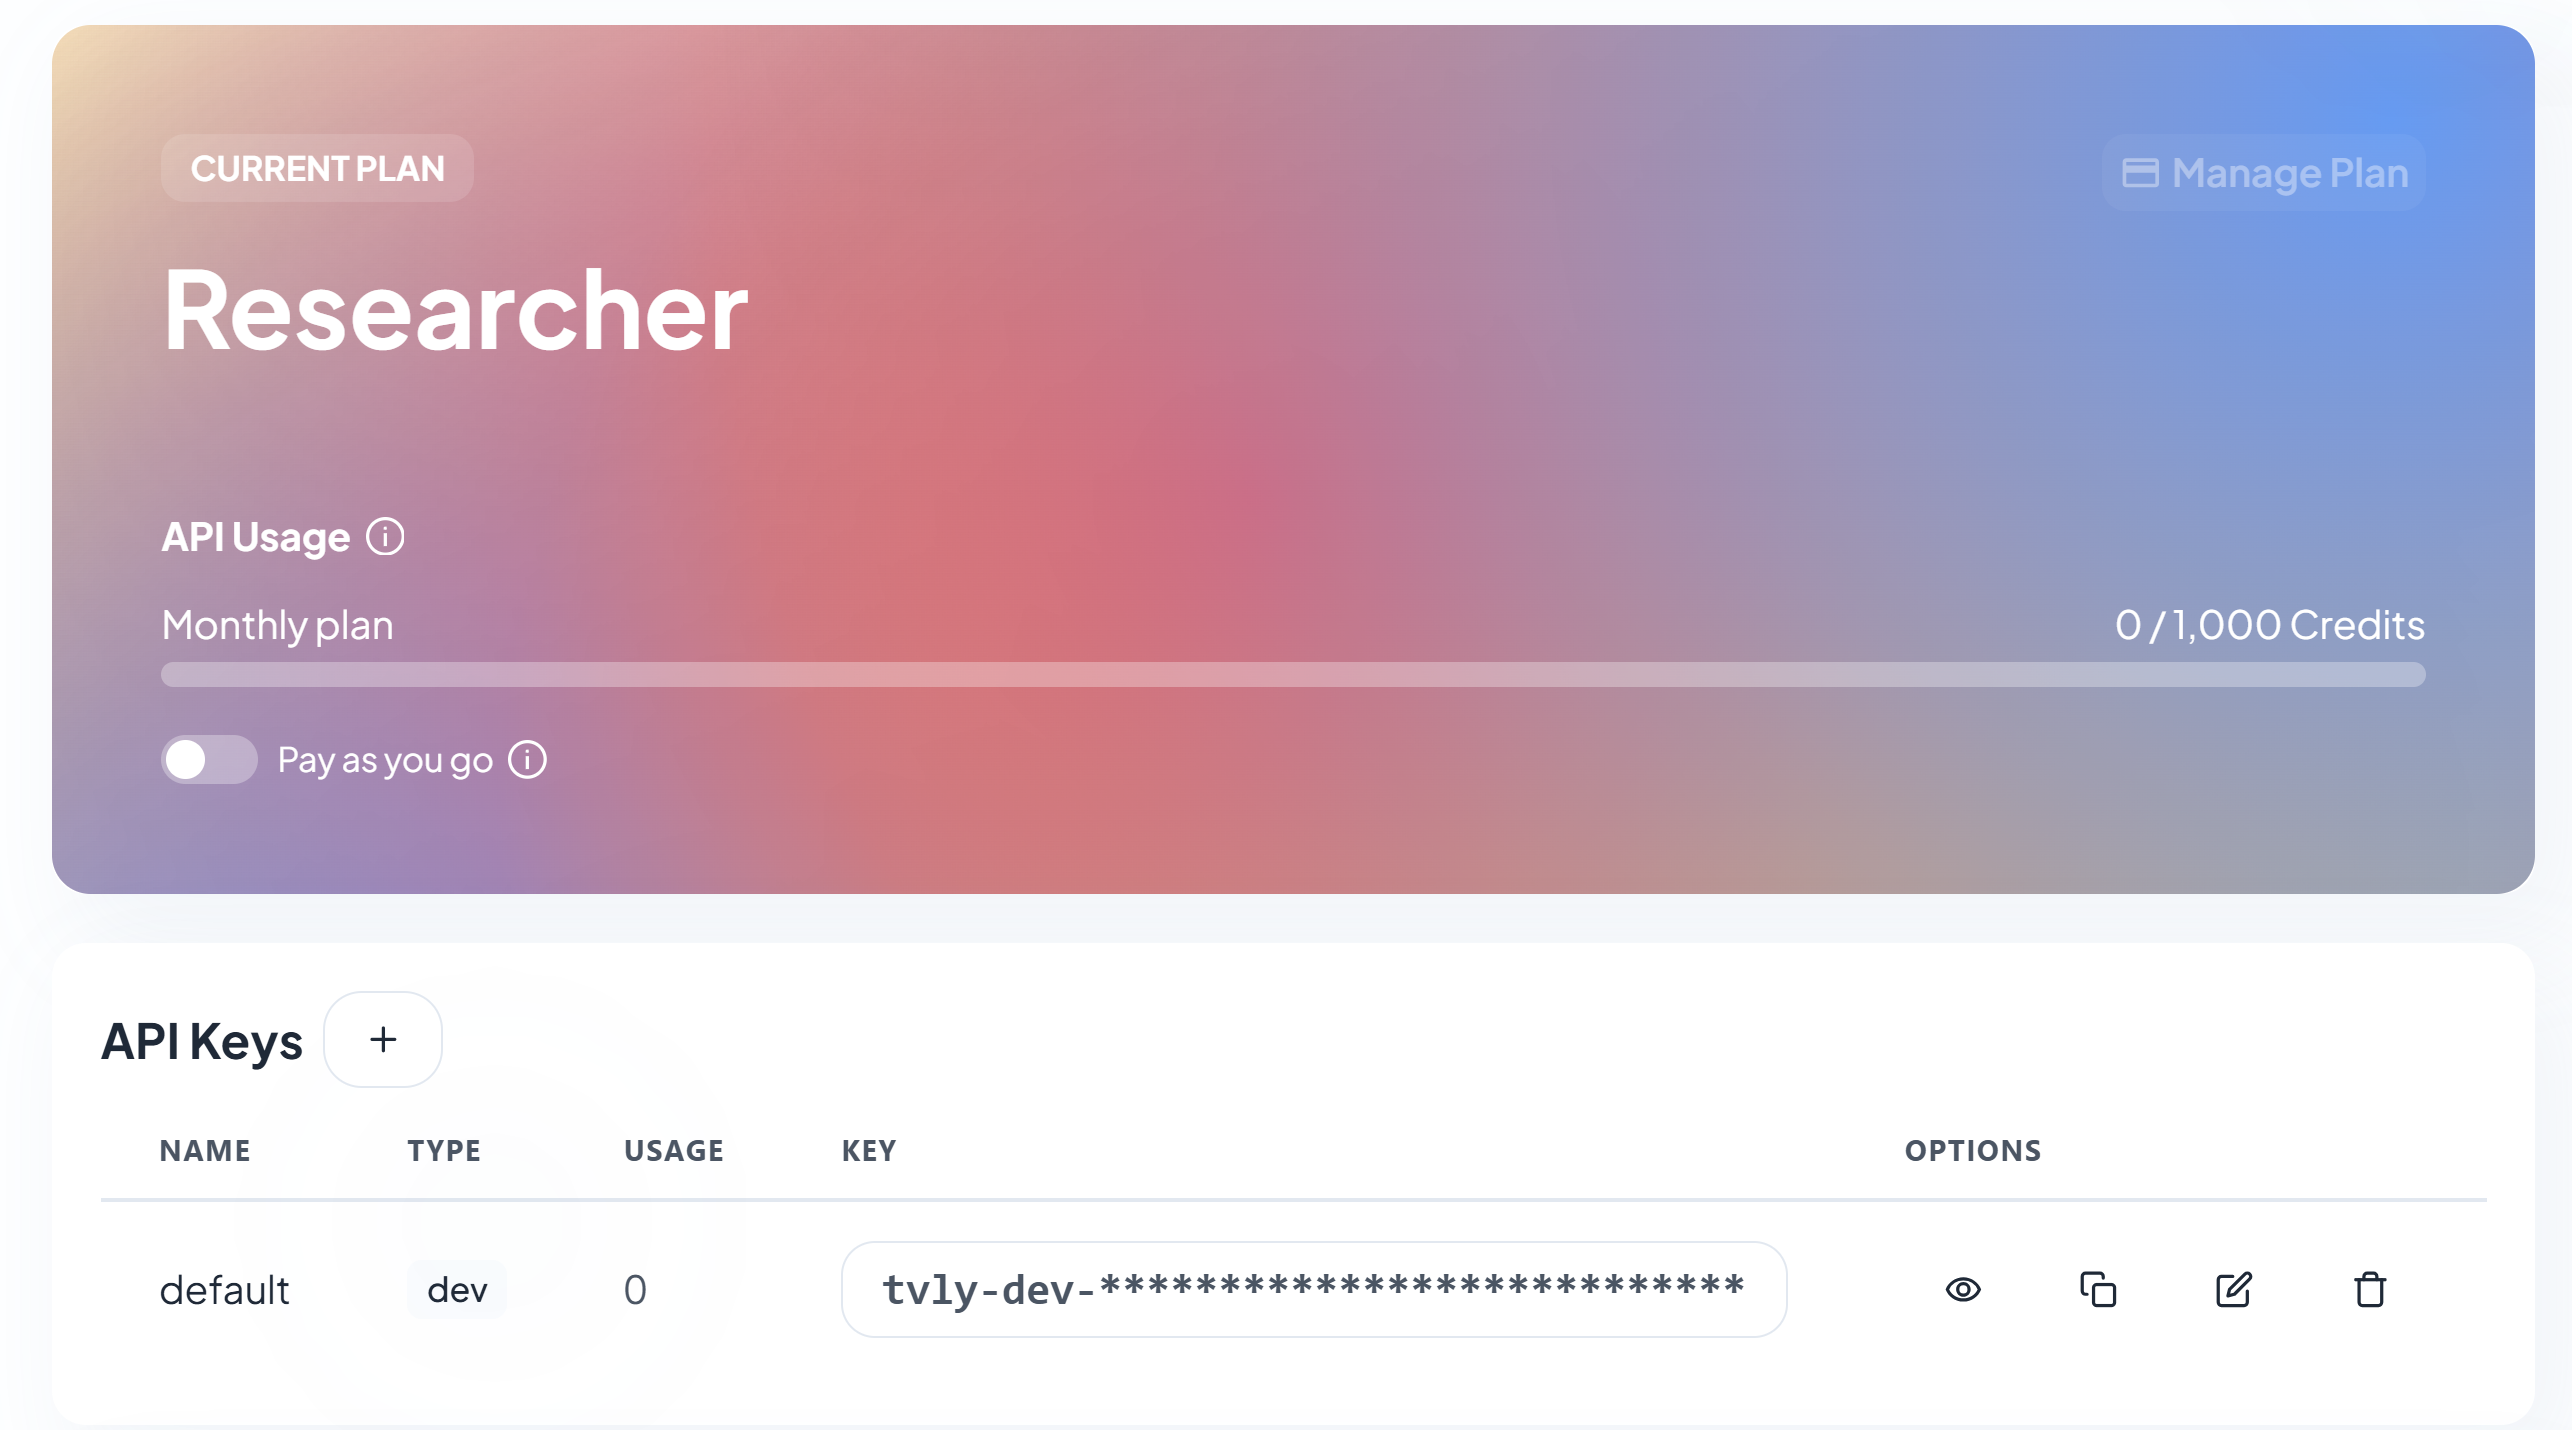

2. Copy the default API key.
3. Add it to your `.env` file: `TAVILY_API_KEY=tvly-...`


### 2. The Mission 🕵️‍♂️
Build an agent that can answer:
> **"What is the weather today in Latvia and Lithuania?"**

### 3. Your Toolkit 🧰
You'll need to:
1.  Create a `search_web(query)` function using Tavily.
2.  Add it to your `tools` list.
3.  Update the `TOOLS_MAP`.
4.  Run the `react_cycle` with a question that needs searching!


In [44]:
from tavily import TavilyClient

# 1. Setup Tavily
tavily_api_key = os.getenv("TAVILY_API_KEY")
if not tavily_api_key:
    raise ValueError(
        "❌ TAVILY_API_KEY not found!\n"
        "   Make sure your .env file contains: TAVILY_API_KEY=your-api-key\n"
    )

tavily_client = TavilyClient(api_key=tavily_api_key)


# 2. CREATE YOUR SEARCH TOOL
def search_web(query: str, max_results: 5) -> dict:
    """
    Searches the web for the given query.
    Useful for getting up-to-date information, news, or facts.
    """
    # TODO: Use tavily_client.search() to get results and return them as a dict
    # Hint: Look at the tavily_client.search() method and its max_results parameter
    results = tavily_client.search(query=query, max_results=max_results)
    return {"results": results}
    


# 3. UPDATE YOUR TOOL LISTS
# TODO: Add your new search_web tool and final_answer to the tools list for OpenAI
my_new_tools = [search_web, final_answer]

# TODO: Add the tool mapping (string name to function)
# Note: "final_answer" is handled specially inside react_cycle(), so don't add it here!
MY_TOOLS_MAP = {"search_web": search_web,
                "final_answer": final_answer}

In [45]:
# 4. USE IT
# Ask a question that requires searching the web
question = (
    "What is the current stock price of Tesla? And what is 10 shares of it worth?"
)

# Run the cycle!
# Now we explicitely pass our tools and a custom system prompt
system_prompt = (
    "You are a helpful assistant with access to the web. "
    "Use the search_web tool to find real-time information."
)

answer = react_cycle(
    question,
    tools=my_new_tools,
    tool_map=MY_TOOLS_MAP,
    system_instruction=system_prompt,
)


--- ITERATION 1 ---
🧠 REASON
🙌 ACT: Calling 'search_web' with {'query': 'Tesla current stock price', 'max_results': '1'}
👀 OBSERVE: Result = {'results': {'query': 'Tesla current stock price', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.tradingview.com/symbols/NASDAQ-TSLA/', 'title': 'TSLA Stock Price — Tesla Chart - TradingView', 'content': 'The current price of TSLA is 409.38 USD — it has increased by 2.45% in the past 24 hours. Watch Tesla, Inc. stock price performance more closely on the chart.', 'score': 0.92794675, 'raw_content': None}], 'response_time': 0.98, 'request_id': 'fddc0cdb-d2eb-41e8-88fb-2759e01859e0'}}
📝 REMEMBER: Stored result for 'search_web'

--- ITERATION 2 ---
🧠 REASON
🙌 ACT: Calling 'final_answer' with {'answer': 'The current stock price of Tesla (TSLA) is $409.38. The worth of 10 shares of Tesla is $4093.80.', 'explanation': 'Each share of Tesla is currently priced at $409.38. Therefore, 10 shares would be 10 time

### Exercise 5: Ask a Multi-Step Web + Math Question 🌐🧮

Now ask your agent a question that requires **both** web search **and** math!

The agent should:
1. Search the web for some information
2. Use that information in a calculation

Example questions:
- `"What is the population of Lithuania? Divide it by 1000."`
- `"Search for the height of the Eiffel Tower in meters, then multiply it by 3."`
- `"What is the weather in Latvia? If the temperature is above 20, add 5, otherwise subtract 5."`

In [46]:
# TODO: Ask a question that needs BOTH web search and math
# Use react_cycle with your tools and an appropriate system instruction

question = (
    "What is the current population of Poland? Divide it by 50000."
)

system_prompt = (
    "You are a helpful assistant with access to the web. "
    "Use the search_web tool to find real-time information."
)
my_new_tools.append(subtract_numbers)
my_new_tools.append(add_numbers)
my_new_tools.append(divide_numbers)
MY_TOOLS_MAP["subtract_numbers"] = subtract_numbers
MY_TOOLS_MAP["add_numbers"] = add_numbers
MY_TOOLS_MAP["divide_numbers"] = divide_numbers
answer = react_cycle(
    question,
    tools=my_new_tools,
    tool_map=MY_TOOLS_MAP,
    system_instruction=system_prompt,
)


--- ITERATION 1 ---
🧠 REASON
🙌 ACT: Calling 'search_web' with {'query': 'current population of Poland', 'max_results': '1'}
👀 OBSERVE: Result = {'results': {'query': 'current population of Poland', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.worldometers.info/world-population/poland-population/', 'title': 'Poland Population (2026) - Worldometer', 'content': "The current population of Poland is 37,877,788 as of Tuesday, February 24, 2026, based on Worldometer's elaboration of the latest United Nations data1. Poland", 'score': 0.94989765, 'raw_content': None}], 'response_time': 0.66, 'request_id': 'fa2a874a-e731-4abf-8882-b551fe279315'}}
📝 REMEMBER: Stored result for 'search_web'

--- ITERATION 2 ---
🧠 REASON
🙌 ACT: Calling 'divide_numbers' with {'a': 37877788, 'b': 50000}
👀 OBSERVE: Result = {'result': 757.55576}
📝 REMEMBER: Stored result for 'divide_numbers'

--- ITERATION 3 ---
🧠 REASON
🙌 ACT: Calling 'final_answer' with {'answer': 'The

### 🏆 Final - Exercise 6: Build a Multi-Topic Research Agent

This is the **ultimate challenge!** Build an agent that can research multiple topics and compare them.

**Task:** Ask your agent a question that requires **multiple web searches** and **combining** the results:

> *"Compare the populations of Latvia and Lithuania. Which country has more people and by how many?"*

The agent will need to:
1. Search for Latvia's population
2. Search for Lithuania's population
3. Use `subtract_numbers` to find the difference
4. Give a final comparison

**Hints:**
- Make sure `subtract_numbers` and `search_web` are both in your tools list and map
- Use a good system instruction that tells the agent to search for each country separately
- Set `max_iterations` high enough (e.g., 10) since multiple searches take multiple iterations

In [47]:
# TODO: Build a tools list and map that includes search_web AND subtract_numbers (plus the other math tools)
# ^ Added tools in cell above

# TODO: Ask a multi-search comparison question using react_cycle
# Think about what system_instruction and max_iterations you'll need

question = "Compare the populations of Latvia and Lithuania. Which country has more people and by how many?"
answer = react_cycle(
    question,
    tools=my_new_tools,
    tool_map=MY_TOOLS_MAP,
    system_instruction=system_prompt,
)


--- ITERATION 1 ---
🧠 REASON
🙌 ACT: Calling 'search_web' with {'query': 'Current population of Latvia', 'max_results': '1'}
👀 OBSERVE: Result = {'results': {'query': 'Current population of Latvia', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.worldometers.info/world-population/latvia-population/', 'title': 'Latvia Population (2025)', 'content': "The current population of Latvia is 1,841,520 as of Monday, February 23, 2026, based on Worldometer's elaboration of the latest United Nations data1. Latvia", 'score': 0.9568646, 'raw_content': None}], 'response_time': 0.83, 'request_id': 'c3d2ce8a-5b14-4be8-b653-4b70f3a4b4fa'}}
📝 REMEMBER: Stored result for 'search_web'
🙌 ACT: Calling 'search_web' with {'query': 'Current population of Lithuania', 'max_results': '1'}
👀 OBSERVE: Result = {'results': {'query': 'Current population of Lithuania', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://countrymeters.info

# Final Note:
- You have learned how AI Agents work under the hood which is the foundation of Agentic AI!

- Next you will learn frameworks that make building agents and their workflows easier, like LangChain and LangGraph.

- Have fun coding! 🚀